In [1]:
# Sourcing & Analyzing Time-Series Data


In [2]:
### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

In [3]:
### 1. Importing your libraries and data


In [4]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [5]:
# Configure API key 

quandl.ApiConfig.api_key = 'yourAPIkey'

In [6]:
# Import data

path = r'C:\Users\Mary\Desktop\Data Analyst CF\Part 6'


In [7]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'dfcorrelations.csv'), index_col = 0)


In [62]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None


In [9]:
df.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,zip_code_prefix_customer,lat_customer,lng_customer,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,customer_unique_id,zip_code_prefix_seller,lat_seller,lng_seller,seller_city,seller_state,product_category_name,review_category,freight_flag,pur_del,start_date,end_date,n_of_days,distance
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,-23.537922,-46.477696,sao paulo,SP,1,debit_card,1,18.30,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,d71da8fd8c6e3adef26be965f065b8a1,5,b1a1199364a4a7fe27c4486ab63f550d,13848,-22.331249,-46.922580,mogi guaçu,SP,perfumery,Good review,Low freight,3 days 00:25:24,2018-04-24,2018-04-27,3,2399.699757
1,a035b83b3628decee6e3823924e0c10f,53.0,2235.0,3.0,1450.0,20.0,25.0,20.0,b18cb761efbe70da4838435a349abd07,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-07-06 19:31:03,268.38,21.07,3694,-23.537922,-46.477696,sao paulo,SP,1,credit_card,10,289.45,9ff6d1a05ecfe2d907adac11a2e2bfe9,delivered,2018-07-04 18:39:28,2018-07-05 16:33:14,2018-07-05 13:21:00,2018-07-10 22:34:39,2018-07-27 00:00:00,0f0f85749cb82321d902e390a9c33694,4,fc68ba9c34778e17224154c255b5656e,84200,-24.256442,-49.709951,jaguariaíva,PR,perfumery,Good review,Medium freight,6 days 03:55:11,2018-07-04,2018-07-10,6,2662.455144
2,091107484dd7172f5dcfed173e4a960e,50.0,260.0,2.0,183.0,16.0,8.0,13.0,a7708ffa8966514c098d15e1abfa6417,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-27 19:31:35,7.65,10.55,3694,-23.537922,-46.477696,sao paulo,SP,1,credit_card,2,57.75,360782688ff472f1adbd47a85861751e,delivered,2018-04-23 19:03:35,2018-04-24 19:17:45,2018-04-24 16:22:36,2018-04-25 23:02:39,2018-05-15 00:00:00,39489f8518181b82cb86ce264e1ccc55,5,c67329fd07872a68d6d6d1f1626a0760,3804,-23.502716,-46.482996,sao paulo,SP,perfumery,Good review,Low freight,2 days 03:59:04,2018-04-23,2018-04-25,2,2340.750167
3,e8b61f78db501ea0ca45677d1ca27de2,49.0,120.0,1.0,400.0,50.0,10.0,25.0,a7708ffa8966514c098d15e1abfa6417,2,3d871de0142ce09b7081e2b9d1733cb1,2018-04-27 19:31:35,29.00,10.55,13232,-23.207064,-46.760735,campo limpo paulista,SP,1,credit_card,2,57.75,360782688ff472f1adbd47a85861751e,delivered,2018-04-23 19:03:35,2018-04-24 19:17:45,2018-04-24 16:22:36,2018-04-25 23:02:39,2018-05-15 00:00:00,39489f8518181b82cb86ce264e1ccc55,5,c67329fd07872a68d6d6d1f1626a0760,3804,-23.502716,-46.482996,sao paulo,SP,toys,Good review,Low freight,2 days 03:59:04,2018-04-23,2018-04-25,2,2377.637320
4,ccac9976bafbf7e587bd2c29302e2314,53.0,2235.0,3.0,1500.0,20.0,25.0,20.0,206d1a13596872a713dba14504fdf699,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-08-01 16:35:17,268.38,18.07,3694,-23.537922,-46.477696,sao paulo,SP,1,credit_card,8,286.45,58c5eb8e7844d1ecd85128e663f49e04,delivered,2018-07-29 20:50:22,2018-07-30 18:31:13,2018-08-01 15:24:00,2018-08-06 18:36:46,2018-08-15 00:00:00,36b616f738d1f617cc12aeb2c01705f3,3,1b6d2664b20a04a1fa9c900aedf29440,71920,-15.829934,-48.032895,brasilia,DF,perfumery,Medium review,Medium freight,7 days 21:46:24,2018-07-29,2018-08-06,8,2701.745065


In [10]:
#### 2. Subsetting, wrangling, and cleaning time-series data


In [30]:
# Create a subset for the time-series analysis

subset =  df.groupby('start_date',as_index=False).agg({'order_id': 'count', 'payment_value': 'sum', 'customer_unique_id': 'count', 'review_score':'mean'})


In [31]:
subset.head()

,start_date,order_id,payment_value,customer_unique_id,review_score
0,2016-10-03,8,595.14,8,3.000000
1,2016-10-04,69,11916.58,69,4.028986
2,2016-10-05,50,13090.24,50,3.820000
3,2016-10-06,47,8323.57,47,3.914894
4,2016-10-07,44,7889.51,44,3.659091


In [32]:
subset.shape

(611, 5)

In [33]:
# Rename columns
subset.rename(columns = {'start_date' : 'purchase_date', 'order_id': 'n_orders', 'payment_value': 'value', 'customer_unique_id': 'n_customers', 'review_score': 'avg_review_score'}, inplace = True)


In [34]:
subset.head()

,purchase_date,n_orders,value,n_customers,avg_review_score
0,2016-10-03,8,595.14,8,3.000000
1,2016-10-04,69,11916.58,69,4.028986
2,2016-10-05,50,13090.24,50,3.820000
3,2016-10-06,47,8323.57,47,3.914894
4,2016-10-07,44,7889.51,44,3.659091


In [16]:
def overview(dataframe):
    """This function will return the overview of the dataframe"""
    
    print("Shape of the dataframe is : {}".format(dataframe.shape))
    print("**"*30)
    print("Information about features : ",dataframe.info())
    print("**"*30)
    print("Total number of null values : \n ",dataframe.isnull().sum())
    print("**"*30)
    print("Description : \n ",dataframe.describe())
    print("**"*30)
    return dataframe.head(5)



In [35]:
overview(subset)

Shape of the dataframe is : (611, 5)
************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 610
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   purchase_date     611 non-null    object 
 1   n_orders          611 non-null    int64  
 2   value             611 non-null    float64
 3   n_customers       611 non-null    int64  
 4   avg_review_score  611 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 28.6+ KB
Information about features :  None
************************************************************
Total number of null values : 
  purchase_date       0
n_orders            0
value               0
n_customers         0
avg_review_score    0
dtype: int64
************************************************************
Description : 
            n_orders          value  n_customers  avg_review_score
count   611

,purchase_date,n_orders,value,n_customers,avg_review_score
0,2016-10-03,8,595.14,8,3.000000
1,2016-10-04,69,11916.58,69,4.028986
2,2016-10-05,50,13090.24,50,3.820000
3,2016-10-06,47,8323.57,47,3.914894
4,2016-10-07,44,7889.51,44,3.659091


In [36]:
subset['avg_value_day'] = subset['value']/subset['n_customers']

In [63]:
subset

,purchase_date,n_orders,value,n_customers,avg_review_score,avg_value_day
0,2016-10-03,8,595.14,8,3.000000,74.392500
1,2016-10-04,69,11916.58,69,4.028986,172.704058
2,2016-10-05,50,13090.24,50,3.820000,261.804800
3,2016-10-06,47,8323.57,47,3.914894,177.097234
4,2016-10-07,44,7889.51,44,3.659091,179.307045
5,2016-10-08,42,9678.47,42,4.166667,230.439762
6,2016-10-09,31,5614.89,31,3.548387,181.125484
7,2016-10-10,43,4484.79,43,4.046512,104.297442
8,2016-12-23,1,19.62,1,5.000000,19.620000
9,2017-01-05,32,707.27,32,4.906250,22.102188


In [40]:
subset.index.astype('str')


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '601', '602', '603', '604', '605', '606', '607', '608', '609', '610'],
      dtype='object', length=611)

In [67]:
subset['date'] = pd.to_datetime(subset['purchase_date']) # Create a datetime column from "Date."
subset = subset.set_index('date') # Set the datetime as the index of the dataframe.
subset.drop(['purchase_date'], axis=1, inplace=True) # Drop the "Date" column.
subset.head()

,n_orders,value,n_customers,avg_review_score,avg_value_day
date,,,,,
2016-10-03,8,595.14,8,3.000000,74.392500
2016-10-04,69,11916.58,69,4.028986,172.704058
2016-10-05,50,13090.24,50,3.820000,261.804800
2016-10-06,47,8323.57,47,3.914894,177.097234
2016-10-07,44,7889.51,44,3.659091,179.307045


In [70]:
subset.resample('D').asfreq()

,n_orders,value,n_customers,avg_review_score,avg_value_day
date,,,,,
2016-10-03,8.0,595.14,8.0,3.000000,74.392500
2016-10-04,69.0,11916.58,69.0,4.028986,172.704058
2016-10-05,50.0,13090.24,50.0,3.820000,261.804800
2016-10-06,47.0,8323.57,47.0,3.914894,177.097234
2016-10-07,44.0,7889.51,44.0,3.659091,179.307045
2016-10-08,42.0,9678.47,42.0,4.166667,230.439762
2016-10-09,31.0,5614.89,31.0,3.548387,181.125484
2016-10-10,43.0,4484.79,43.0,4.046512,104.297442
2016-10-11,NaN,NaN,NaN,NaN,NaN


In [233]:
subset.shape

(611, 5)

In [73]:
# Create a subset with only date and n_orders

sub1 = subset.drop(columns = ['value', 'n_customers', 'avg_review_score', 'avg_value_day'])


In [74]:
sub1.head()

,n_orders
date,
2016-10-03,8
2016-10-04,69
2016-10-05,50
2016-10-06,47
2016-10-07,44


In [75]:
# Check for duplicates

dups = sub1.duplicated()
dups.sum()

# there is not a problem to have duplicates because that means that in some days, the same number of orders were made.

322

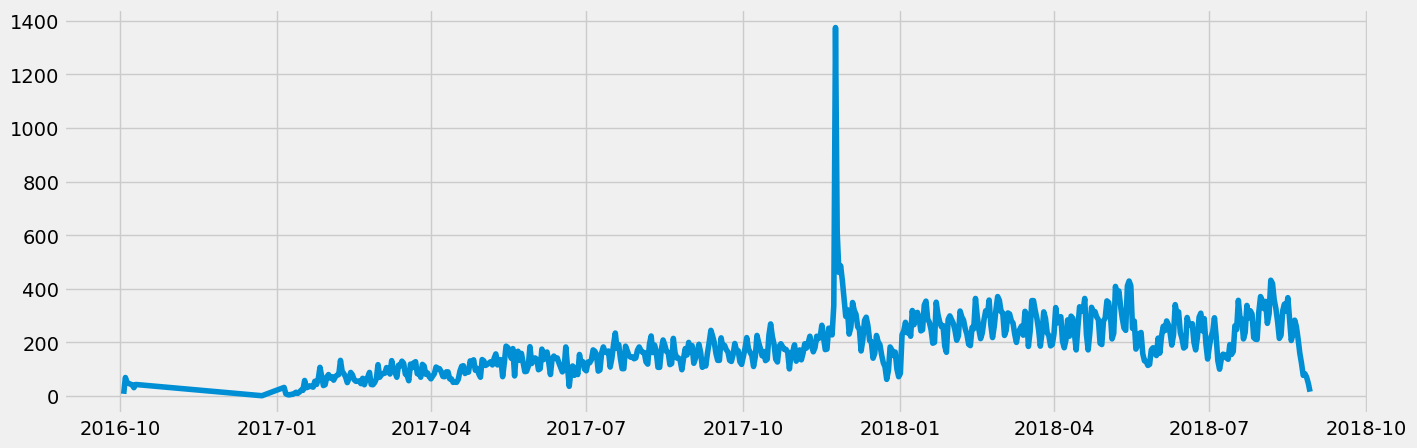

In [76]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(sub1)

In [77]:
# Create a subset with only date and value


sub2 = subset.drop(columns = ['n_orders', 'n_customers', 'avg_review_score', 'avg_value_day'])

In [78]:
sub2.head()

,value
date,
2016-10-03,595.14
2016-10-04,11916.58
2016-10-05,13090.24
2016-10-06,8323.57
2016-10-07,7889.51


In [79]:
# Check for duplicates

dups = sub2.duplicated()
dups.sum()

# No duplicates.

0

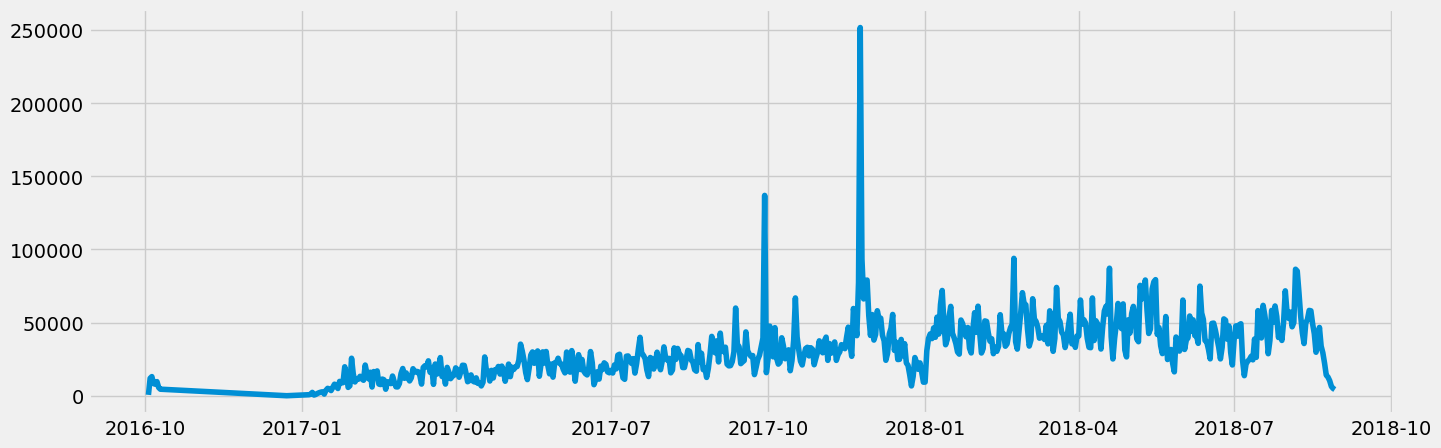

In [80]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(sub2)

In [81]:
# Create a subset with only date and n_customers


sub3 = subset.drop(columns = ['n_orders', 'value', 'avg_review_score', 'avg_value_day'])

In [82]:
sub3.head()

,n_customers
date,
2016-10-03,8
2016-10-04,69
2016-10-05,50
2016-10-06,47
2016-10-07,44


In [83]:
# Check for duplicates

dups = sub3.duplicated()
dups.sum()

# Few duplicates, the same number as for n_orders.

322

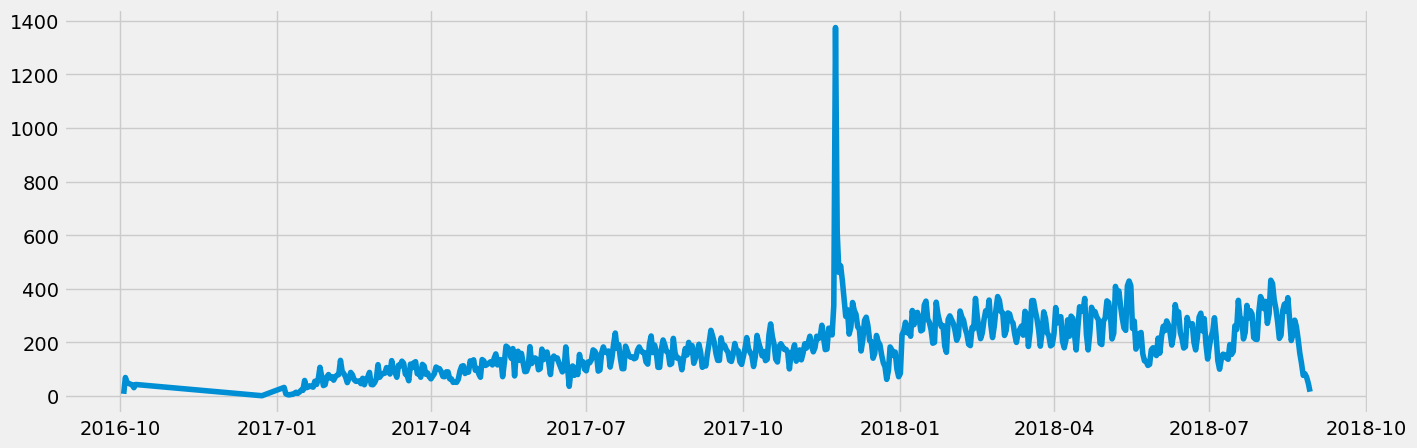

In [84]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(sub3)

In [92]:
# Create a subset with only date and n_customers


sub4 = subset.drop(columns = ['n_orders', 'value', 'n_customers', 'avg_value_day'])

In [93]:
sub4.head()

,avg_review_score
date,
2016-10-03,3.000000
2016-10-04,4.028986
2016-10-05,3.820000
2016-10-06,3.914894
2016-10-07,3.659091


In [88]:
# Check for duplicates

dups = sub4.duplicated()
dups.sum()

# Few duplicates, which is excepcted. It is normal to have the same avg_review_score in some days.

22

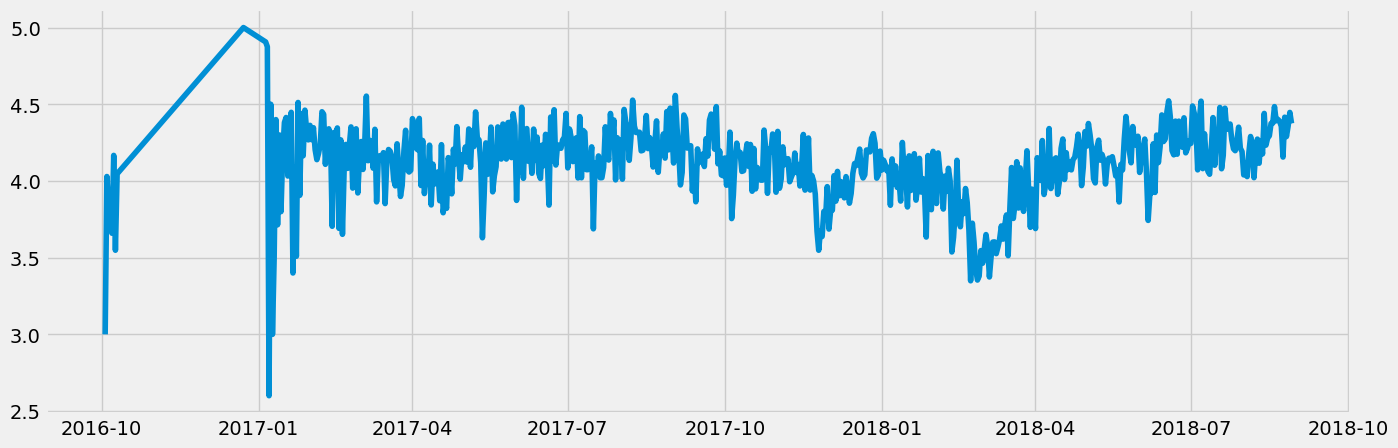

In [89]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(sub4)

In [94]:
# Create a subset with only date and avg-value


sub5 = subset.drop(columns = ['n_orders', 'value', 'n_customers', 'avg_review_score'])

In [95]:
sub5.head()

,avg_value_day
date,
2016-10-03,74.392500
2016-10-04,172.704058
2016-10-05,261.804800
2016-10-06,177.097234
2016-10-07,179.307045


In [96]:
# Check for duplicates

dups = sub5.duplicated()
dups.sum()

# No duplicates

0

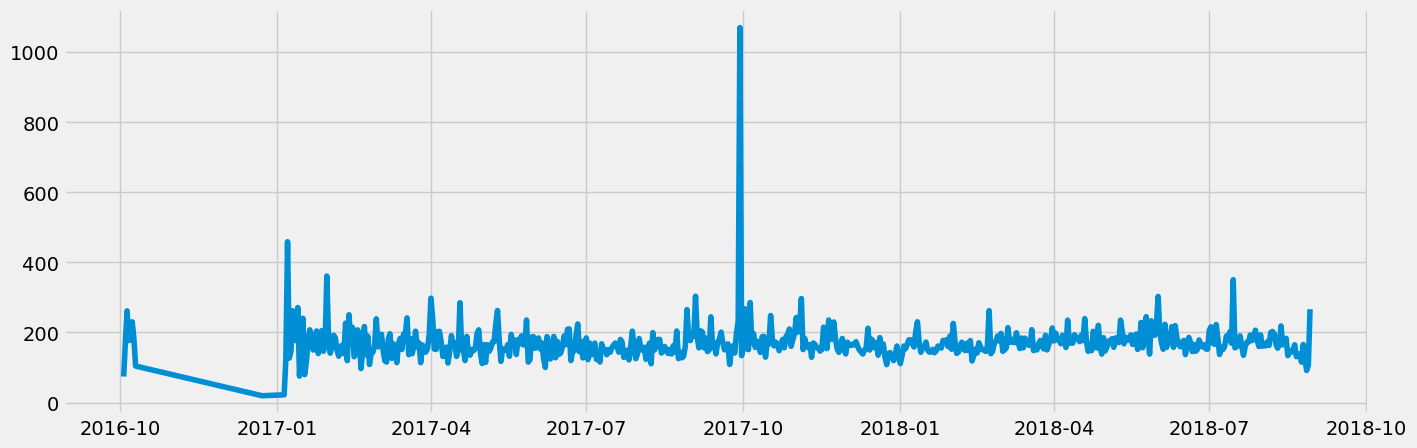

In [97]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(sub5)

In [98]:
### 3. Time-series analysis: decomposition

In [99]:
sub1.sort_index(inplace=True)

In [100]:
sub1.head()

,n_orders
date,
2016-10-03,8
2016-10-04,69
2016-10-05,50
2016-10-06,47
2016-10-07,44


In [101]:
sub1.tail()

,n_orders
date,
2018-08-25,77
2018-08-26,83
2018-08-27,70
2018-08-28,47
2018-08-29,16


In [103]:
sub1.sort_index(inplace=True)

In [112]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(sub1, model='additive', period = int(len(subset)/2))

In [109]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

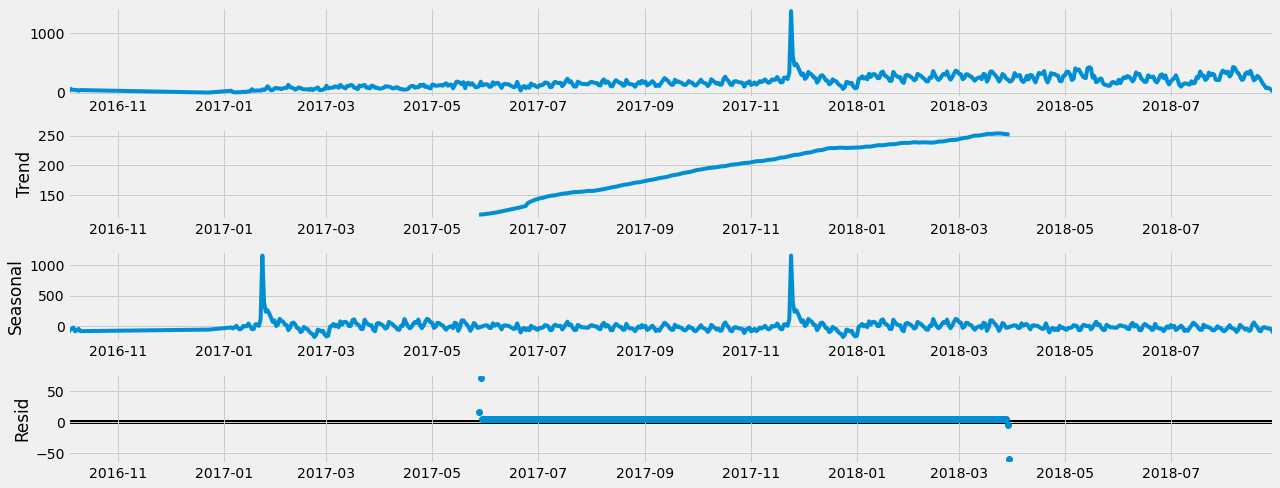

In [110]:
# Plot the separate components for sub 1 = date and N_orders

decomposition.plot()
plt.show()

In [113]:
# Decompose the time series using an additive model

decomposition2 = sm.tsa.seasonal_decompose(sub2, model='additive', period = int(len(subset)/2))

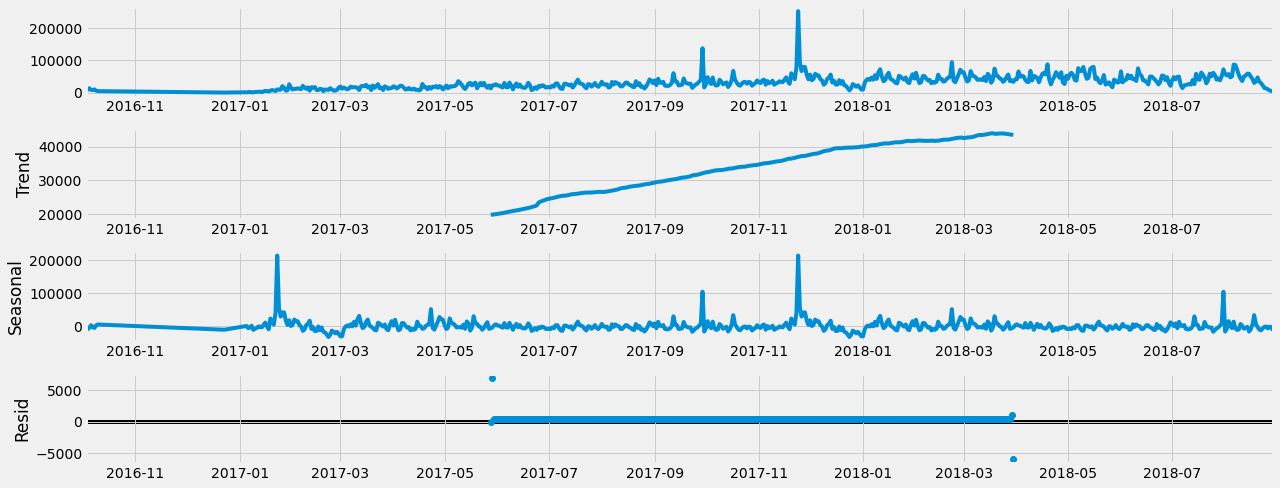

In [114]:
# Plot the separate components for sub 1 = date and value

decomposition2.plot()
plt.show()

In [115]:
# Decompose the time series using an additive model

decomposition4 = sm.tsa.seasonal_decompose(sub4, model='additive', period = int(len(subset)/2))

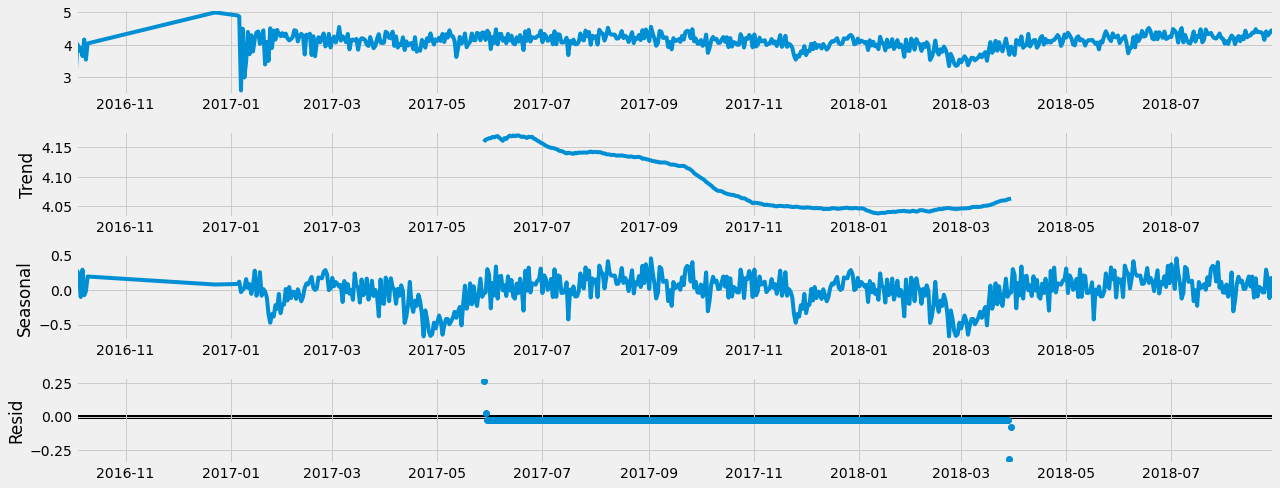

In [116]:
# Plot the separate components for sub 1 = date and avg_review_score

decomposition4.plot()
plt.show()

In [117]:
# Decompose the time series using an additive model

decomposition5 = sm.tsa.seasonal_decompose(sub5, model='additive', period = int(len(subset)/2))

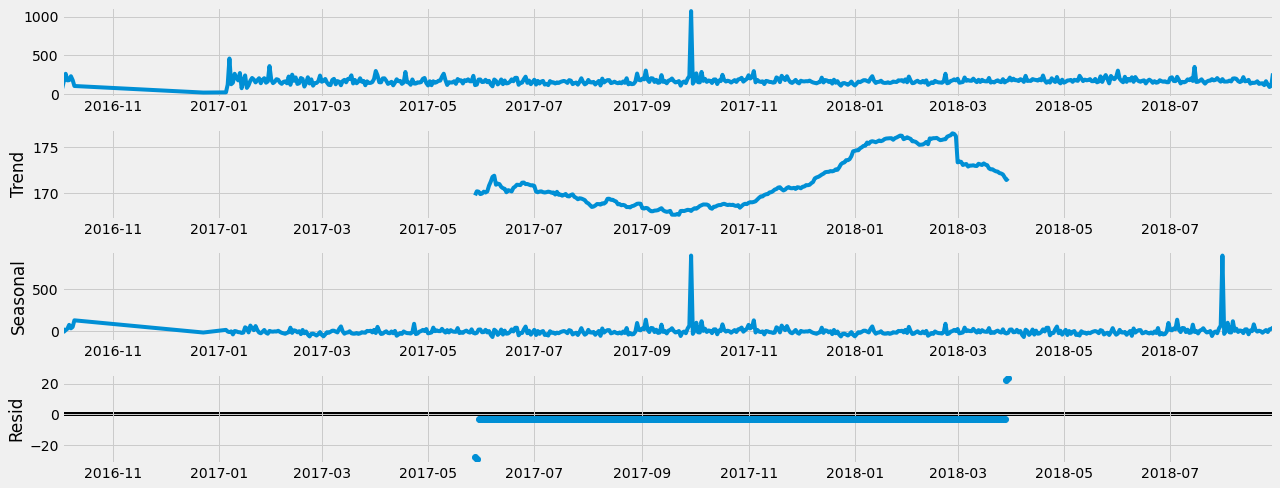

In [118]:
# Plot the separate components for sub 1 = date and avg_value_day

decomposition5.plot()
plt.show()

In [129]:
### 4. Testing for stationarity

In [119]:
# Sub1

# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub1['n_orders'])

Dickey-Fuller Stationarity test:
Test Statistic                  -3.069552
p-value                          0.028890
Number of Lags Used             14.000000
Number of Observations Used    596.000000
Critical Value (1%)             -3.441370
Critical Value (5%)             -2.866402
Critical Value (10%)            -2.569359
dtype: float64


In [177]:
# For sub1, number of orders: 

# Null hypothesis: There is a presence of a unit root
# Alternative hypothesis: is that there’s no unit root.

# p value has a “significant” result becayse the p-value is less than 0.05. 
# Comparing the test statistic to the critical value of the corresponding significance level:
# If the test statistic is larger than the critical value, I can’t reject the null hypothesis. 
# If the test statistic is smaller, then you can reject the null hypothesis


# In this case, test statistic is lower than critical value of 5% - which means that I can reject the null hypothesis.
# this data is stationary. 

# Disprove the null = no unit root = stationary data = can proceed with forecast

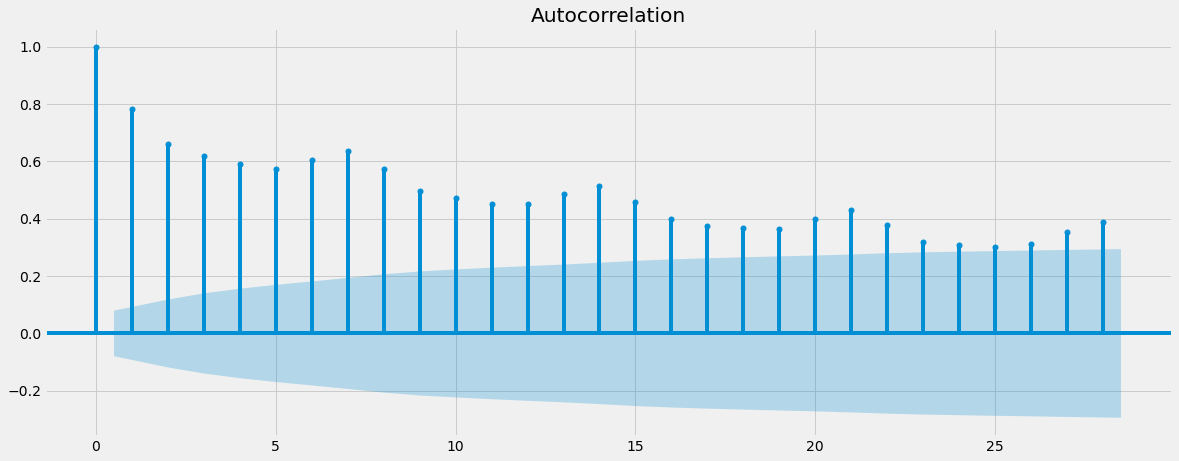

In [178]:
# Check out a plot of autocorrelations - n_orders

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(sub1)
plt.show()

In [179]:
# The vertical lines represent the lags in the series, while the blue area represents the confidence interval. When lines go above the blue edge of the confidence interval, this means I have lags that are significantly correlated with each other. And when there are many lags beyond this interval, it is non-stationary. 
# Despite the Dickey-Fuller test saying that your data is stationary, that stationarity is weak

In [180]:
### 5. Stationarizing the Data for sub1


In [181]:
#For subset1
data_diff1 = sub1 - sub1.shift(1) # The sub1.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [182]:
data_diff1.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [189]:
data_diff1

,n_orders
date,
2016-10-04,61.0
2016-10-05,-19.0
2016-10-06,-3.0
2016-10-07,-3.0
2016-10-08,-2.0
2016-10-09,-11.0
2016-10-10,12.0
2016-12-23,-42.0
2017-01-05,31.0


In [186]:
data_diff1.columns

Index(['n_orders'], dtype='object')

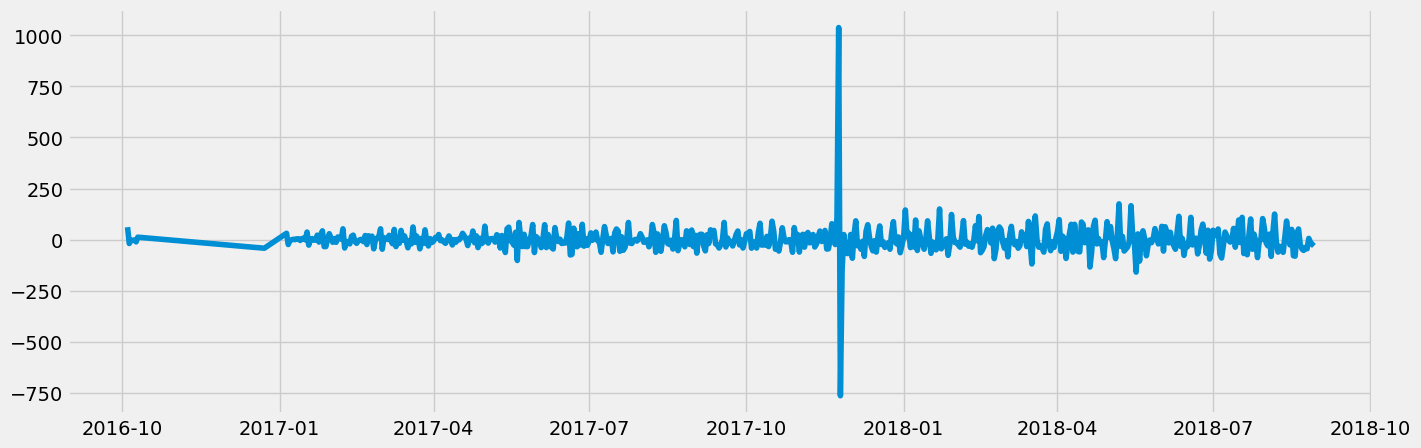

In [187]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff1)

In [188]:
dickey_fuller(data_diff1)

Dickey-Fuller Stationarity test:
Test Statistic                -8.164855e+00
p-value                        8.940010e-13
Number of Lags Used            1.300000e+01
Number of Observations Used    5.960000e+02
Critical Value (1%)           -3.441370e+00
Critical Value (5%)           -2.866402e+00
Critical Value (10%)          -2.569359e+00
dtype: float64


In [ ]:
# p value has a “significant” result becayse the p-value is less than 0.05. 
# test statistic is lower than critical value of 5% - which means that I can’t reject the null hypothesis.
# Means that there is a unit root in the data, and the data is non-stationary.

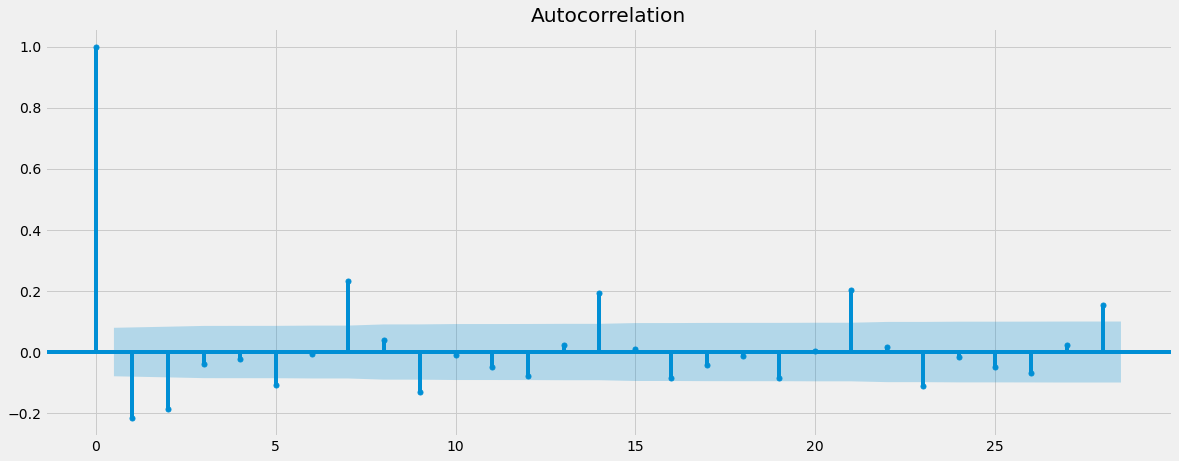

In [234]:
plot_acf(data_diff1)
plt.show()

In [ ]:
# The vertical lines represent the lags in the series, while the blue area represents the confidence interval. When lines go above the blue edge of the confidence interval, this means I have lags that are significantly correlated with each other. And when there are many lags beyond this interval,the data it non-stationary. 
# It looks better than the other plot before the differenciation, with more lags in the confidence interval.

In [121]:
### 4. Testing for stationarity - Sub2

# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub2['value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -3.623909
p-value                          0.005320
Number of Lags Used              8.000000
Number of Observations Used    602.000000
Critical Value (1%)             -3.441259
Critical Value (5%)             -2.866353
Critical Value (10%)            -2.569333
dtype: float64


In [203]:
# For sub2, payment_value: 

# Null hypothesis: There is a presence of a unit root
# Alternative hypothesis: is that there’s no unit root.

# p value has a “significant” result becayse the p-value is less than 0.05. 
# Comparing the test statistic to the critical value of the corresponding significance level:
# If the test statistic is larger than the critical value, I can’t reject the null hypothesis. 
# If the test statistic is smaller, then you can reject the null hypothesis


# In this case, test statistic is lower than critical value of 5% - which means that I can reject the null hypothesis.
# this data is stationary. 

# Disprove the null = no unit root = stationary data = can proceed with forecast

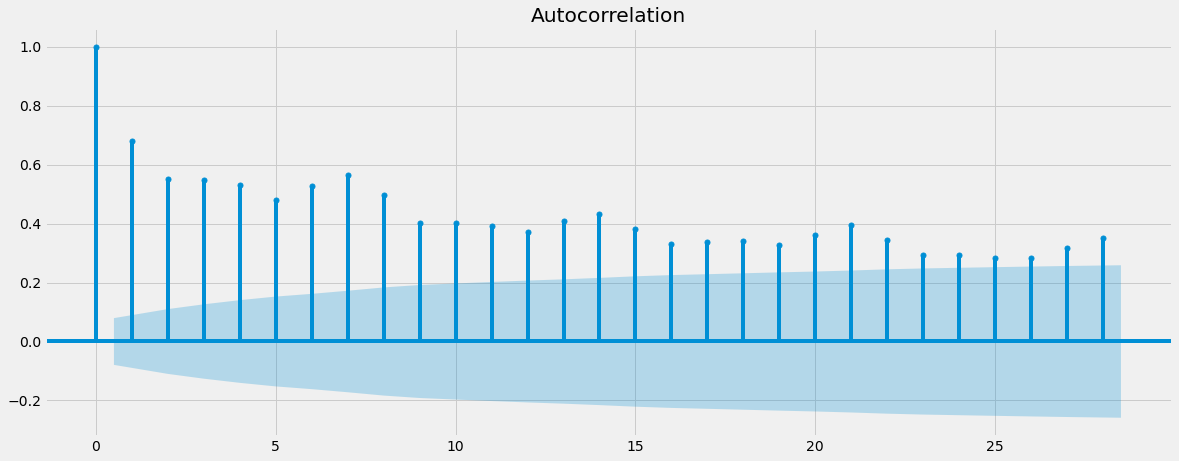

In [204]:
# Check out a plot of autocorrelations - value

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(sub2)
plt.show()

In [205]:
# The vertical lines represent the lags in the series, while the blue area represents the confidence interval. When lines go above the blue edge of the confidence interval, this means I have lags that are significantly correlated with each other. And when there are many lags beyond this interval, the data is non-stationary.
# Despite the Dickey-Fuller test saying that your data is stationary, that stationarity is weak.

In [206]:
### 5. Stationarizing the Data for sub 2


In [207]:
sub2.head()

,value
date,
2016-10-03,595.14
2016-10-04,11916.58
2016-10-05,13090.24
2016-10-06,8323.57
2016-10-07,7889.51


In [208]:
#For subset2
data_diff2 = sub2 - sub2.shift(1) # The sub2.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [209]:
data_diff2.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [210]:
data_diff2.head()

,value
date,
2016-10-04,11321.44
2016-10-05,1173.66
2016-10-06,-4766.67
2016-10-07,-434.06
2016-10-08,1788.96


In [211]:
data_diff2.columns

Index(['value'], dtype='object')

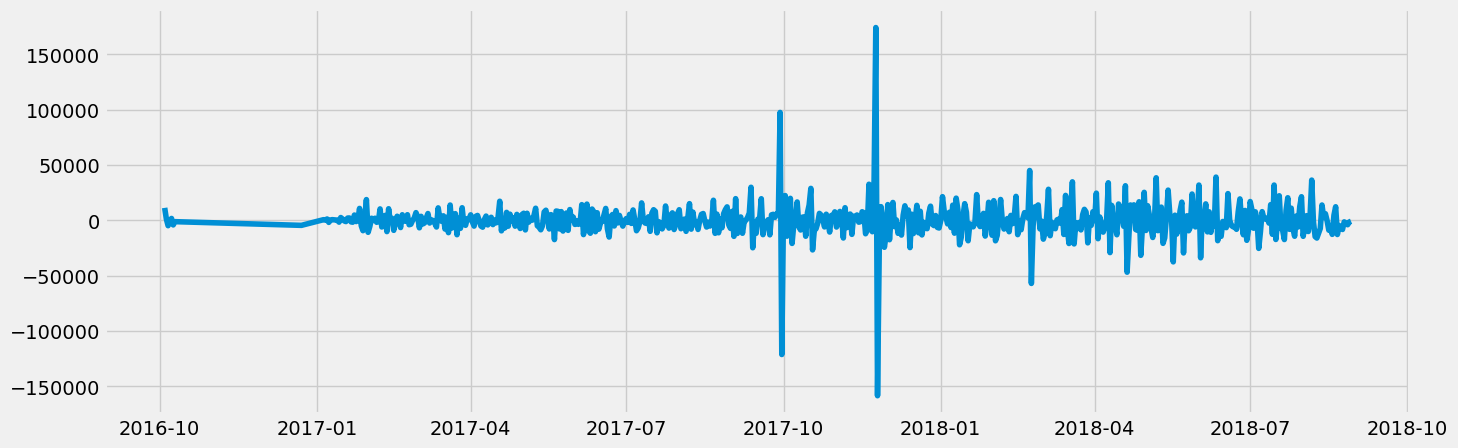

In [212]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [213]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -9.523937e+00
p-value                        3.012919e-16
Number of Lags Used            1.200000e+01
Number of Observations Used    5.970000e+02
Critical Value (1%)           -3.441351e+00
Critical Value (5%)           -2.866393e+00
Critical Value (10%)          -2.569355e+00
dtype: float64


In [214]:
# p value has a “significant” result becayse the p-value is less than 0.05. 
# test statistic is lower than critical value of 5% - which means that I can’t reject the null hypothesis.
# Means that there is a unit root in the data, and the data is non-stationary.

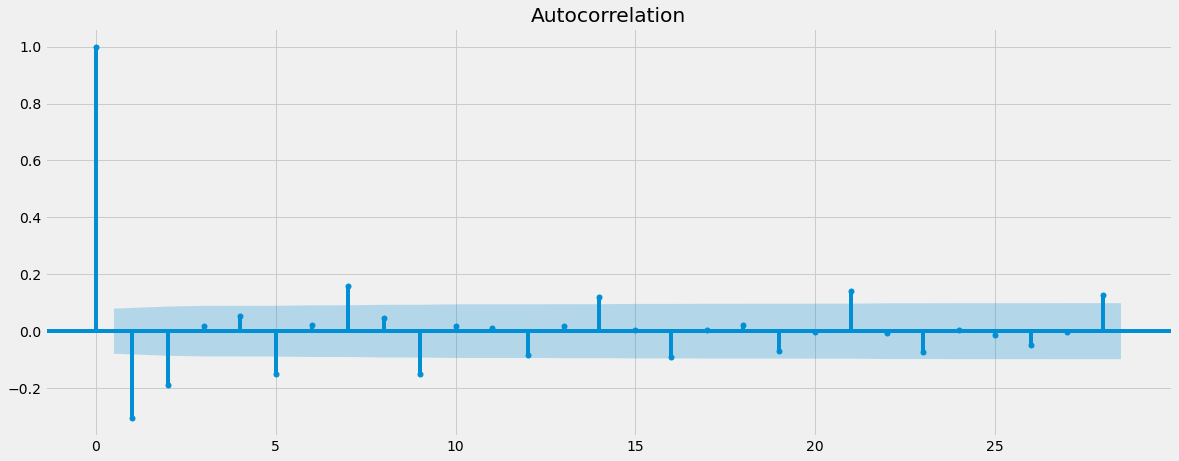

In [201]:
plot_acf(data_diff2)
plt.show()

In [202]:
# The vertical lines represent the lags in the series, while the blue area represents the confidence interval. When lines go above the blue edge of the confidence interval, this means I have lags that are significantly correlated with each other. Although there are more lags in the interval, ther are still many lags beyond, so the data is non-stationary.

In [215]:
### 4. Testing for stationarity for Sub 4

# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub4['avg_review_score'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.978629
p-value                          0.036939
Number of Lags Used             16.000000
Number of Observations Used    594.000000
Critical Value (1%)             -3.441407
Critical Value (5%)             -2.866418
Critical Value (10%)            -2.569368
dtype: float64


In [230]:
# For sub4, avg_review_score: 

# Null hypothesis: There is a presence of a unit root
# Alternative hypothesis: is that there’s no unit root.

# p value has a “significant” result becayse the p-value is less than 0.05. 
# Comparing the test statistic to the critical value of the corresponding significance level:
# If the test statistic is larger than the critical value, I can’t reject the null hypothesis. 
# If the test statistic is smaller, then you can reject the null hypothesis


# In this case, test statistic is lower than critical value of 5% - which means that I can reject the null hypothesis.
# this data is stationary. 

# Disprove the null = no unit root = stationary data = can proceed with forecast

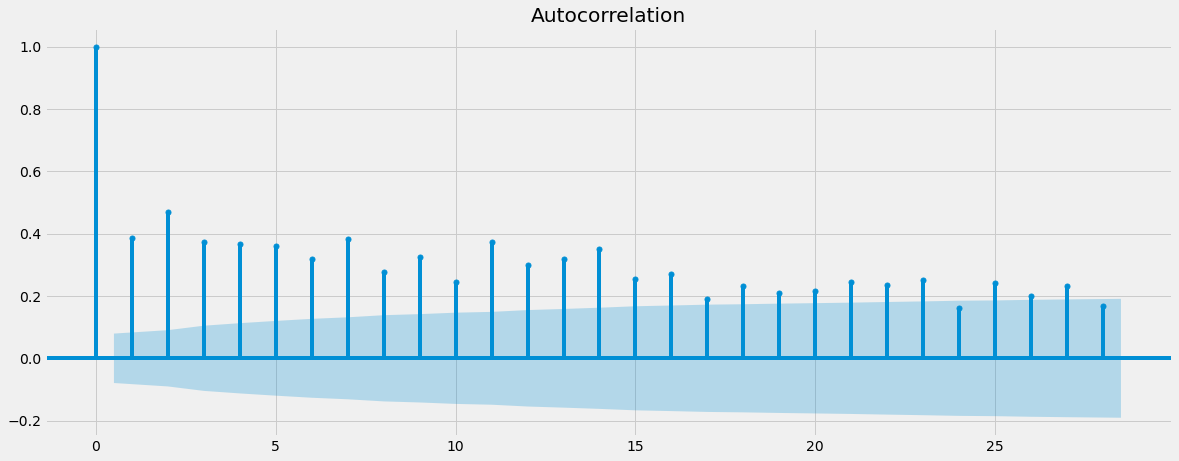

In [125]:
# Check out a plot of autocorrelations - value

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(sub4)
plt.show()

In [216]:
# The vertical lines represent the lags in the series, while the blue area represents the confidence interval. When lines go above the blue edge of the confidence interval, this means I have lags that are significantly correlated with each other. And when there are many lags beyond this interval, the data is non-stationary 
# Despite the Dickey-Fuller test saying that your data is stationary, that stationarity is weak

In [218]:
### 5. Stationarizing the Data for sub 4


sub4.head()

,avg_review_score
date,
2016-10-03,3.000000
2016-10-04,4.028986
2016-10-05,3.820000
2016-10-06,3.914894
2016-10-07,3.659091


In [219]:
#For subset4
data_diff4 = sub4 - sub4.shift(1) # The sub2.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [220]:
data_diff4.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [221]:
data_diff4.head()

,avg_review_score
date,
2016-10-04,1.028986
2016-10-05,-0.208986
2016-10-06,0.094894
2016-10-07,-0.255803
2016-10-08,0.507576


In [222]:
data_diff4.columns

Index(['avg_review_score'], dtype='object')

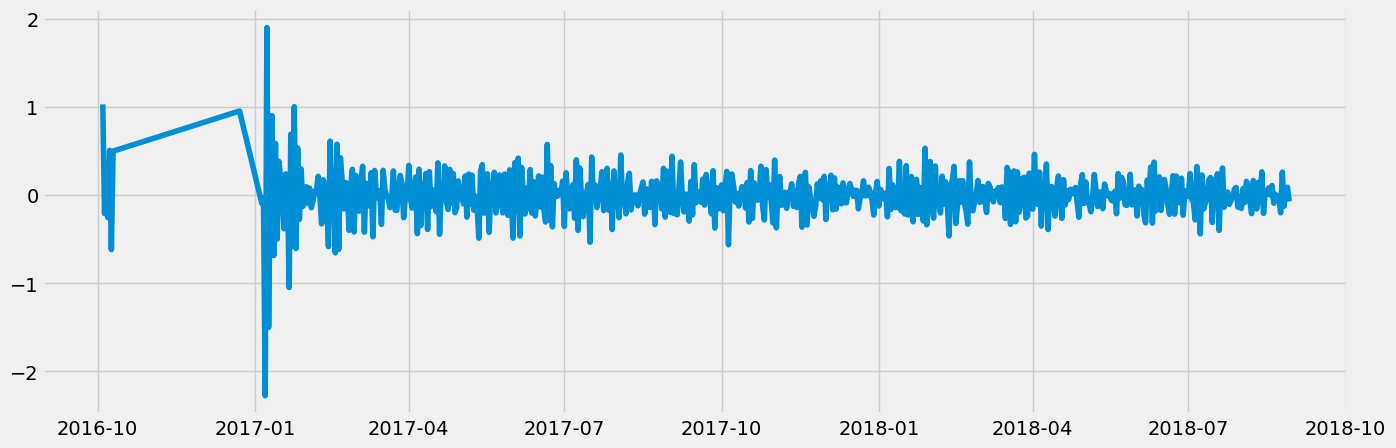

In [223]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff4)

In [224]:
dickey_fuller(data_diff4)

Dickey-Fuller Stationarity test:
Test Statistic                -1.120998e+01
p-value                        2.137446e-20
Number of Lags Used            1.200000e+01
Number of Observations Used    5.970000e+02
Critical Value (1%)           -3.441351e+00
Critical Value (5%)           -2.866393e+00
Critical Value (10%)          -2.569355e+00
dtype: float64


In [225]:
# p value has a “significant” result becayse the p-value is more than 0.05. 
# test statistic is lower than critical value of 5% - which means that I can reject the null hypothesis.
# this data is stationary

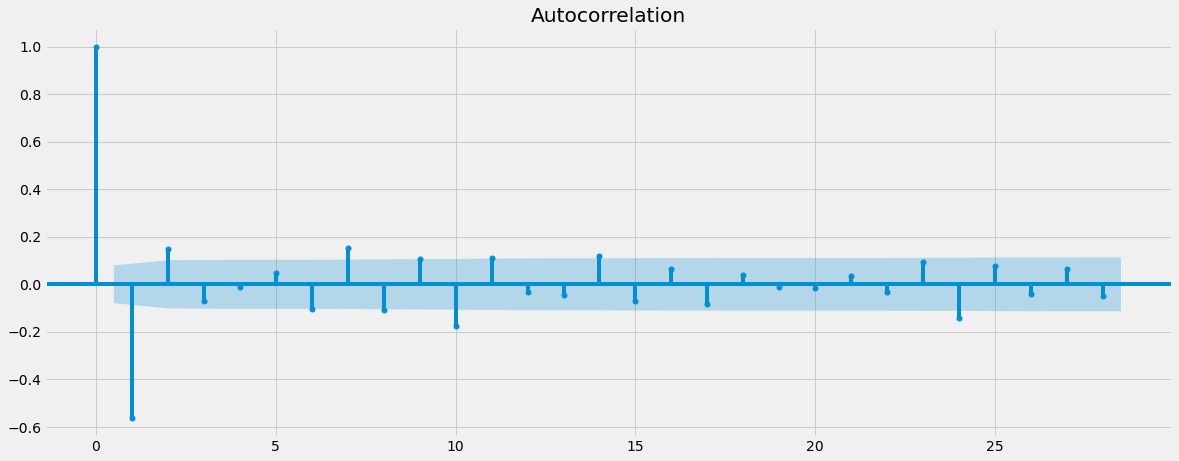

In [226]:
plot_acf(data_diff4)
plt.show()

In [227]:
# The vertical lines represent the lags in the series, while the blue area represents the confidence interval. When lines go above the blue edge of the confidence interval, this means I have lags that are significantly correlated with each other. Although there are more lags in the interval, meaning that the data is stationary.

In [228]:
### 4. Testing for stationarity for Sub 5


# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub5['avg_value_day'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.264324e+01
p-value                        1.419827e-23
Number of Lags Used            2.000000e+00
Number of Observations Used    6.080000e+02
Critical Value (1%)           -3.441151e+00
Critical Value (5%)           -2.866305e+00
Critical Value (10%)          -2.569308e+00
dtype: float64


In [235]:
# For sub5, avg_value_day: 

# Null hypothesis: There is a presence of a unit root
# Alternative hypothesis: is that there’s no unit root.

# p value has a “significant” result becayse the p-value is less than 0.05. 
# Comparing the test statistic to the critical value of the corresponding significance level:
# If the test statistic is larger than the critical value, I can’t reject the null hypothesis. 
# If the test statistic is smaller, then you can reject the null hypothesis


# In this case, test statistic is lower than critical value of 5% - which means that I can reject the null hypothesis.
# this data is stationary. 

# Disprove the null = no unit root = stationary data = can proceed with forecast

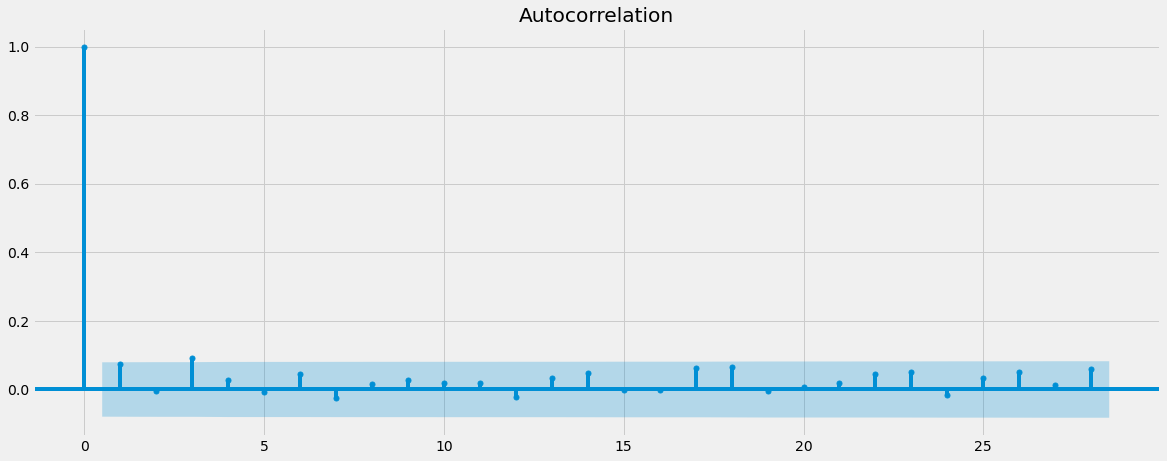

In [231]:
# Check out a plot of autocorrelations - value

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(sub5)
plt.show()

In [232]:
# The vertical lines represent the lags in the series, while the blue area represents the confidence interval. When lines go above the blue edge of the confidence interval, this means I have lags that are significantly correlated with each other. Although there are more lags in the interval, meaning that the data is stationary.